In [ ]:
## Move the model to GPU
## Modify the training loop to move data to GPU
## Modify the evaluation loop to move data to GPU
## Optimise the GPU usage
## Add a learning rate scheduler

1. Move the model to GPU
2. Modify the training loop to move data to GPU
3. Modify the evaluation loop to move data to GPU
4. Optimise the GPU usage
    - Use larger batch sizes: Large batch sizes can better utilize GPU memory and reduce computation time per epoch(batch_size=32 -> 128)
    - Enable DataLoader pinning: Use pin_memory=True in DataLoader to speed up data transfer from CPU to GPU.(data resides in pager memory then moves to pinned memory to further move to GPU | rather keep it in pin_memory in first place)

In [2]:
# Check for GPU
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [ ]:
## Moving model to GPU

import torch.nn as nn
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10))

  def forward(self, x):
    return self.model(x)
  
# Create a model and move it to GPU
model = MyNN(num_features=20)
model.to(device)

In [ ]:
## Moving data to GPU

epochs = 5
for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


With this approach, we got training accuracy = 98% and test accuracy = 88%

Hence we know overfitting is happening

The solution 

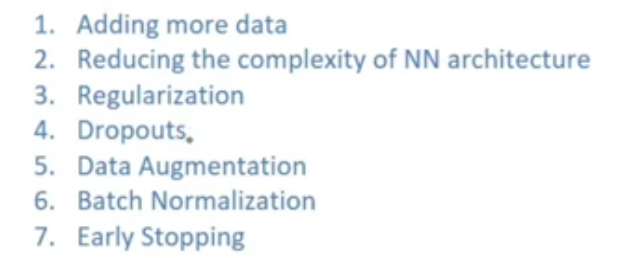

Dropout - kinda Random Forest of NN
- Applied to the hidden layers
- Applied after the ReLU activation function
- Randomly turns off p% neurons in the hidden layer during each forward pass
- This has regularization effect
- During evaluation dropout is not used

In [ ]:
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10))

  def forward(self, x):
    return self.model(x)
  

Batch Normalisation
- Internal Covariate shift
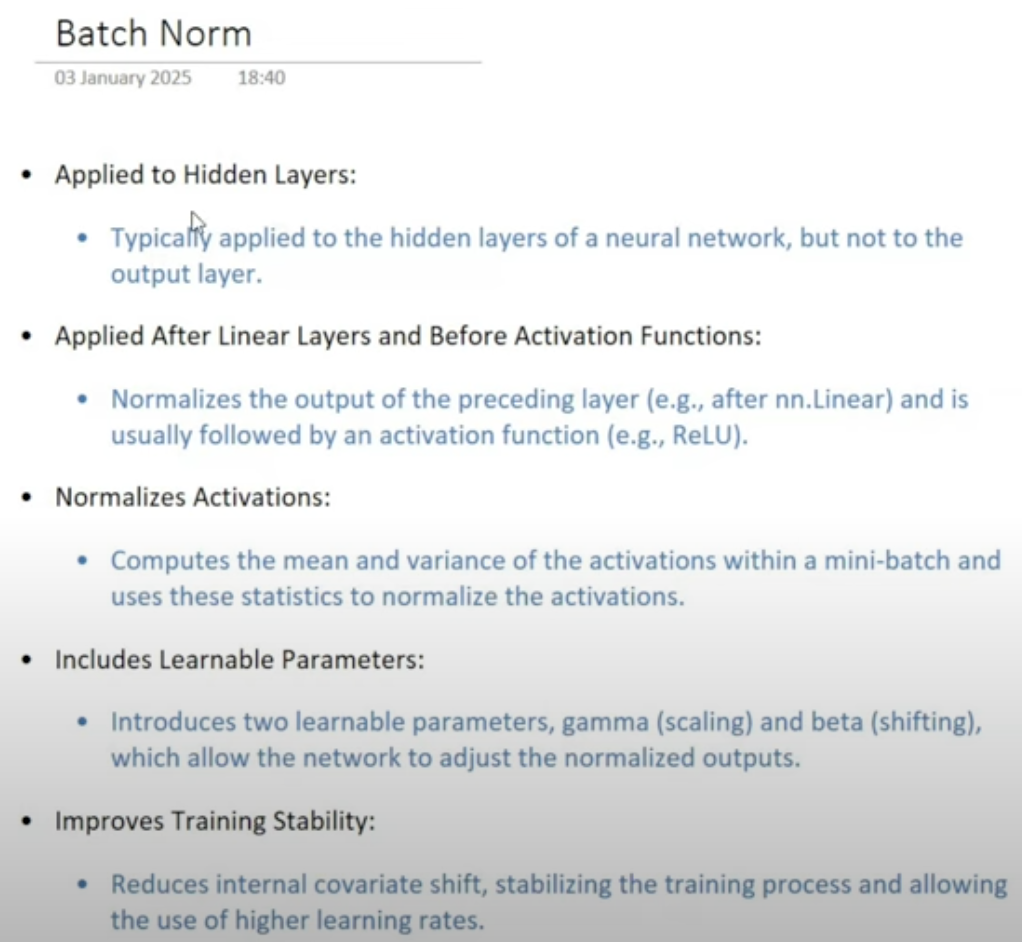

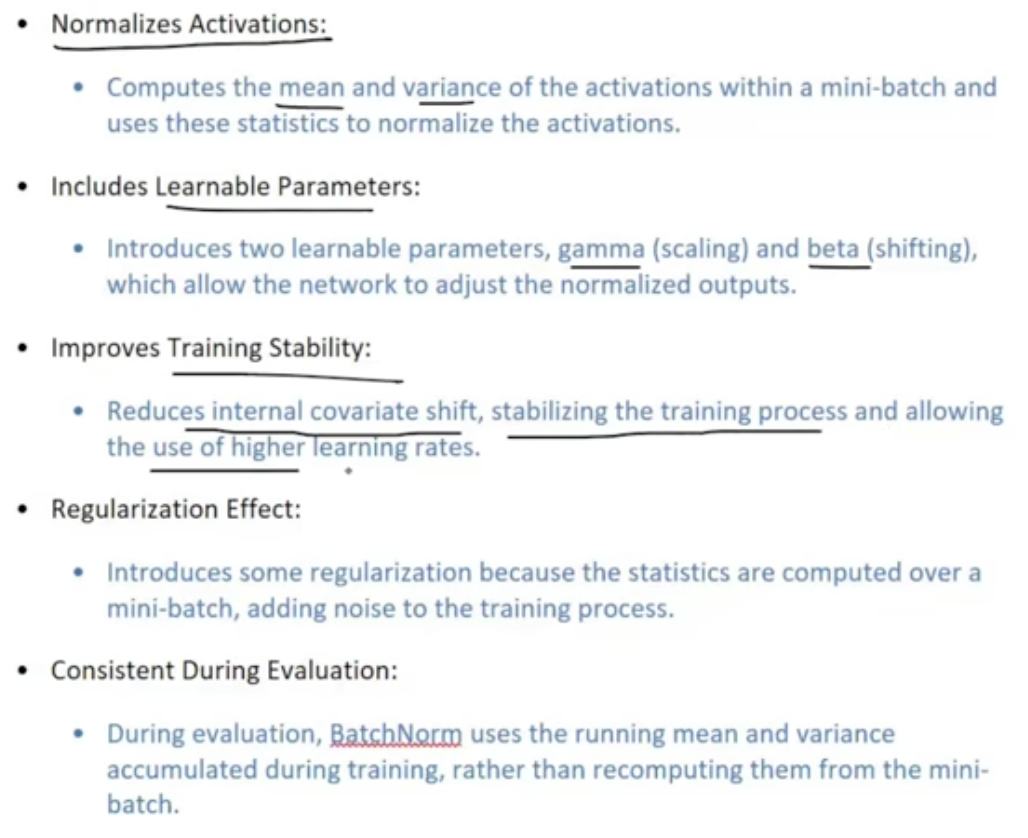

In [ ]:
class MyNN(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(64, 10))

  def forward(self, x):
    return self.model(x)
  

L2 REGULARIZATION

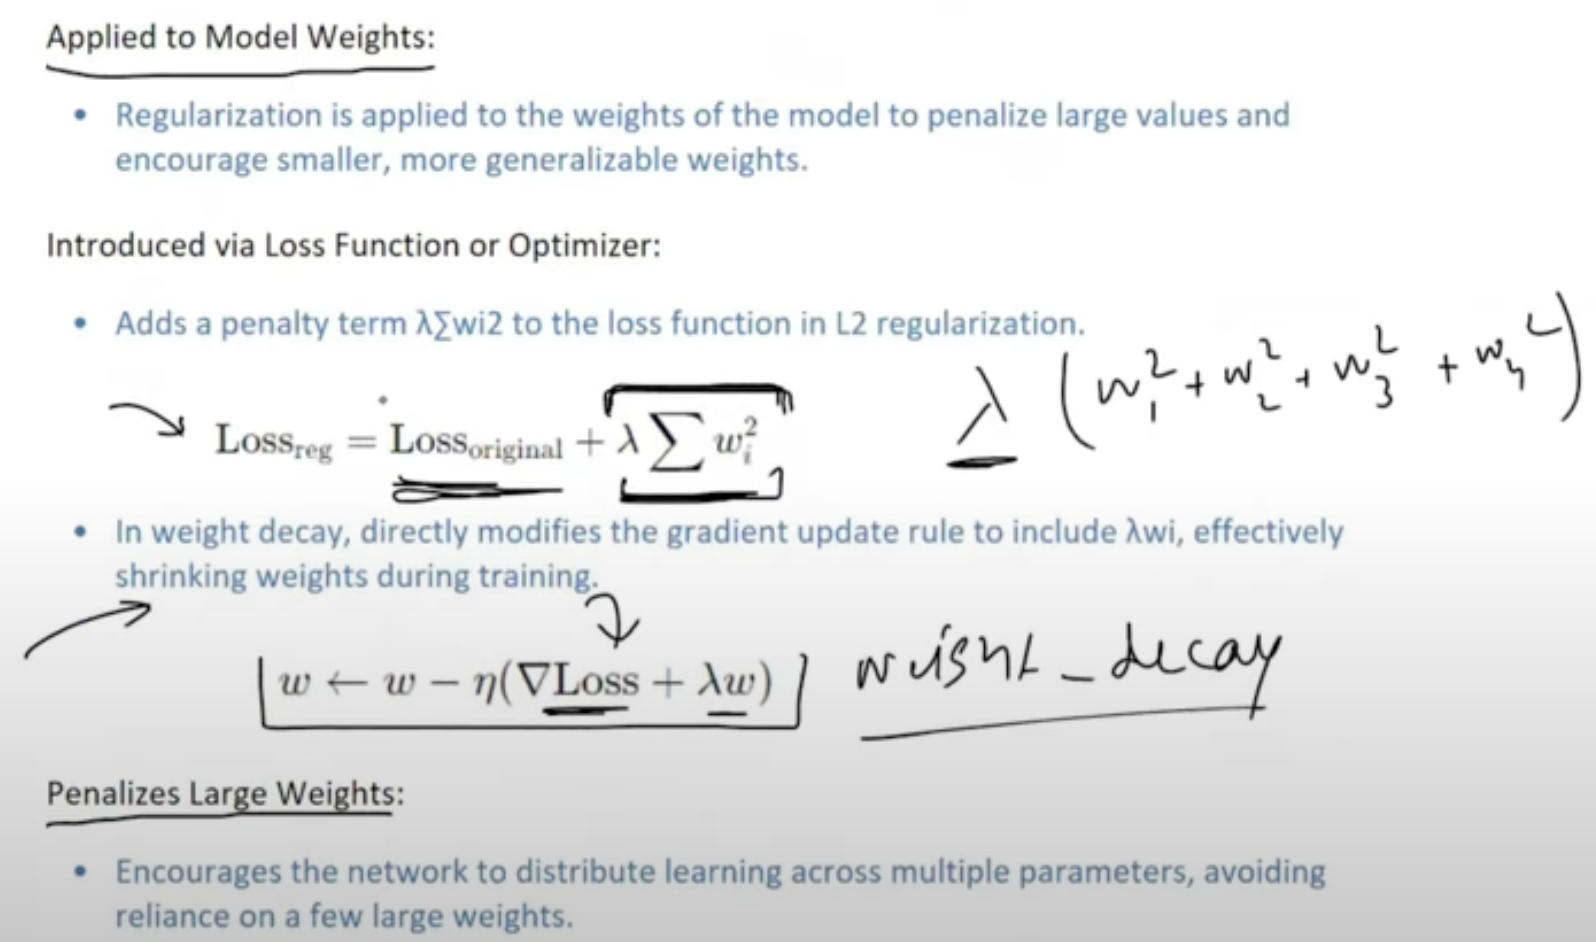

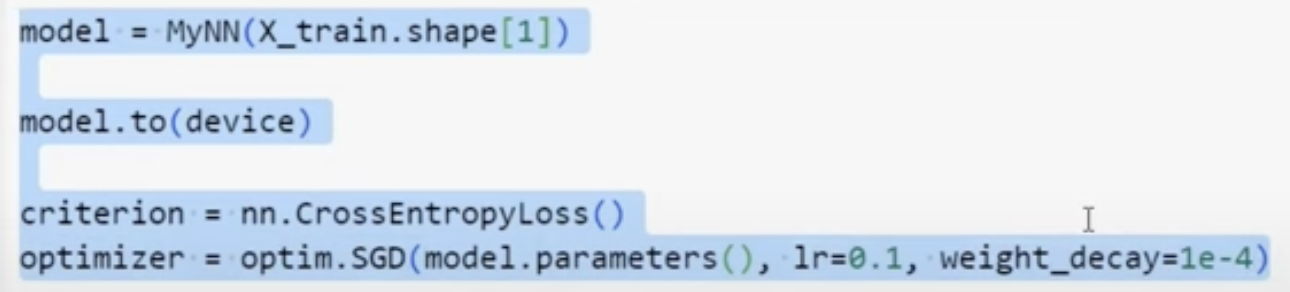

L2 REGULARIZATION